# Importing Hedderfile

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Grid Search CV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

<h3>Reading CSV file using Pandas

In [9]:
#File Data
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
data.shape

(301, 9)

<h2>Analysing Data

In [11]:
print(data['Seller_Type'].unique())
print(data['Fuel_Type'].unique())
print(data['Owner'].unique())
print(data['Transmission'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
[0 1 3]
['Manual' 'Automatic']


In [12]:
data.Car_Name.value_counts(ascending=False)

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

<h4><li>Car Name Can Be Removed <br><br>
    <li>To many variiables and less data</h4> 

<AxesSubplot:>

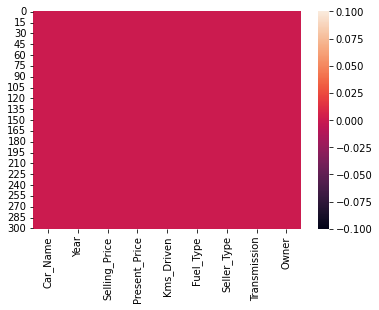

In [13]:
sns.heatmap(data.isnull(), cbar = 'rainbow')

<h4><li>As we can see there is no null value in our data

<h2>Adding Feature

<h4> Adding new Column which determine the Age of Car

In [14]:
data['car_year'] =2021-data['Year']

In [15]:
Fule_dummy = pd.get_dummies(data['Fuel_Type'])
Fule_dummy.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [16]:
data1 = pd.concat([data, Fule_dummy.iloc[:,1:]], axis = 1) #we drop CNG before concatination of file
data1.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_year,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,1,0


In [17]:
data1['Transmission'] = data1['Transmission'].apply(lambda x: 1 if x=='Manual' else 0) # Manual = 1, Automatic = 0
data1['Transmission'].unique()

array([1, 0], dtype=int64)

In [18]:
data1['Seller_Type'] = data1['Seller_Type'].apply(lambda x: 1 if x=='Dealer' else 0) #Dealer = 1, Individual = 0
data1['Seller_Type'].unique()

array([1, 0], dtype=int64)

In [19]:
car_name_split = data1['Car_Name'].apply(lambda x: ' '.join(x.split()[:2]) if len(x.split())>3 else x) #smalling name size
car_name_split.head(4)

0       ritz
1        sx4
2       ciaz
3    wagon r
Name: Car_Name, dtype: object

In [20]:
print(data1['Kms_Driven'].min(),data1['Kms_Driven'].max())

500 500000


In [21]:
#Km Drive
km_bins=[0, 20000, 42000, 100000, 250000, 510000]
km_label= [0,1,2,3,4]
data1["Km_range"] = pd.cut(data1['Kms_Driven'], bins = km_bins, labels = km_label)
#data1['Km_Drive_n'] = pd.cut(data1['Kms_Driven'], bins = 4, labels = km_label)
#data1.head(2)

(array([101.,   0.,  98.,   0.,   0.,  94.,   0.,   7.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

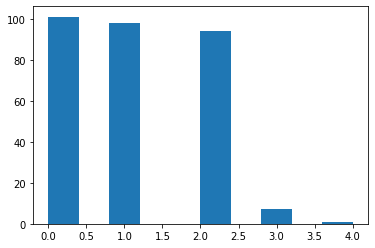

In [22]:
plt.hist(data1["Km_range"])

<h3>Droping Un-wanted value

In [23]:
data1.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_year,Diesel,Petrol,Km_range
0,ritz,2014,3.35,5.59,27000,Petrol,1,1,0,7,0,1,1
1,sx4,2013,4.75,9.54,43000,Diesel,1,1,0,8,1,0,2


In [24]:
data2 = data1.drop(['Car_Name', 'Year', 'Kms_Driven', 'Fuel_Type'], axis = 1)

In [26]:
data2.head(2)

,Selling_Price,Present_Price,Seller_Type,Transmission,Owner,car_year,Diesel,Petrol,Km_range
0,3.35,5.59,1,1,0,7,0,1,1
1,4.75,9.54,1,1,0,8,1,0,2


In [27]:
data2.describe()

,Selling_Price,Present_Price,Seller_Type,Transmission,Owner,car_year,Diesel,Petrol
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,0.647841,0.867110,0.043189,7.372093,0.199336,0.794020
std,5.082812,8.644115,0.478439,0.340021,0.247915,2.891554,0.400166,0.405089
min,0.100000,0.320000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,0.900000,1.200000,0.000000,1.000000,0.000000,5.000000,0.000000,1.000000
50%,3.600000,6.400000,1.000000,1.000000,0.000000,7.000000,0.000000,1.000000
75%,6.000000,9.900000,1.000000,1.000000,0.000000,9.000000,0.000000,1.000000
max,35.000000,92.600000,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000


<h3> Removing Outlier from Data

<AxesSubplot:title={'center':'Box plot for Data Before'}>

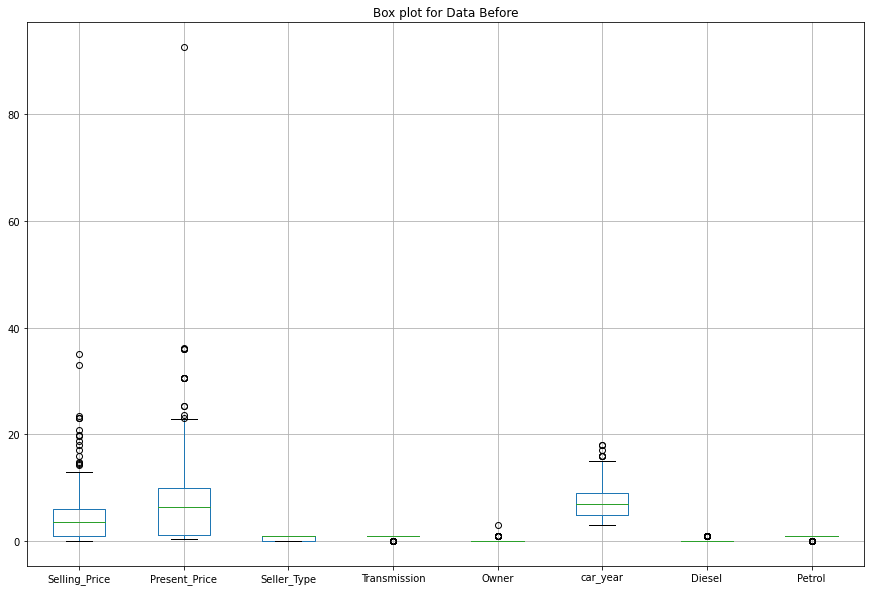

In [28]:
plt.figure(figsize = (15,10))
plt.title("Box plot for Data Before")
data2.boxplot()

In [29]:
arr = data2[data2['Present_Price']>40]['Selling_Price']
#arr  #just for generating index
data3 = data2.drop(arr.index)

<AxesSubplot:title={'center':'Box plot for Data :  After'}>

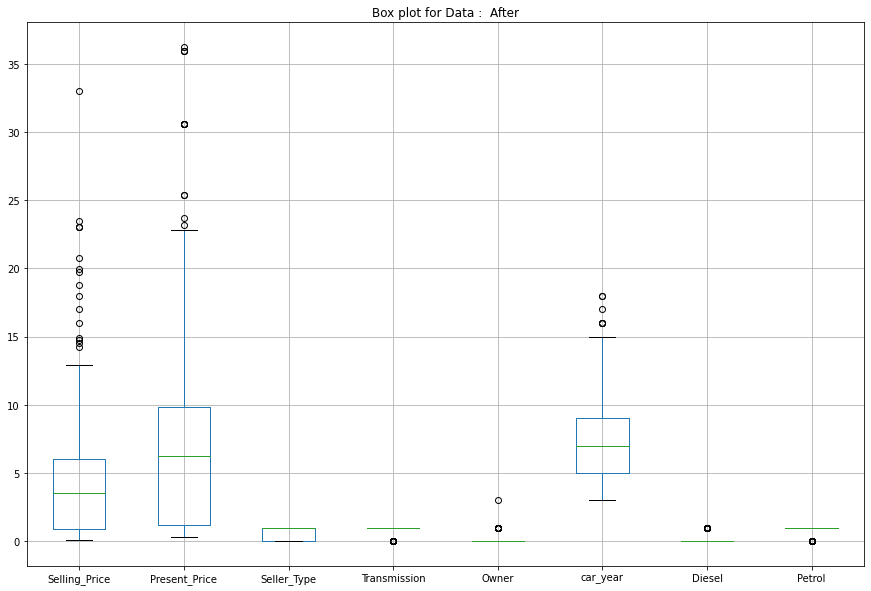

In [30]:
plt.figure(figsize = (15,10))
plt.title("Box plot for Data :  After")
data3.boxplot()

<h3>Analysing Data for modle selection

<AxesSubplot:>

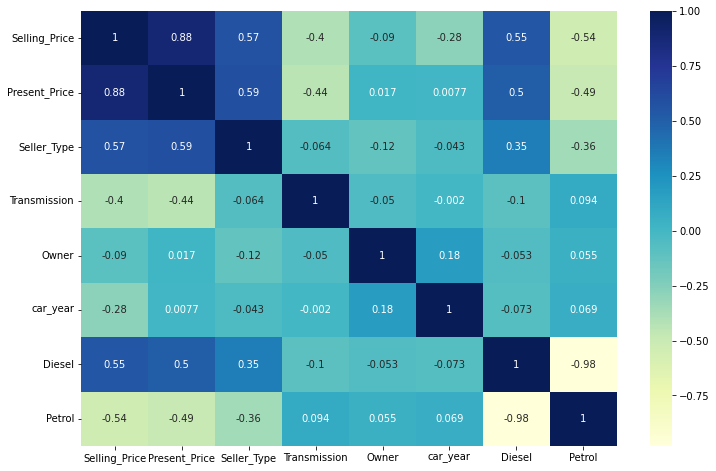

In [31]:
plt.figure(figsize = (12,8))
corr = data3.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True)

<h4><li>There is strong relation between "Present_price" and "Selling_price" <br><br>
    <li>Seller_type and diesel also showing positive responce<br><br>
    <li>Transmission affecting modle in negative way but I am keeping it because it is inverse of output</h4>

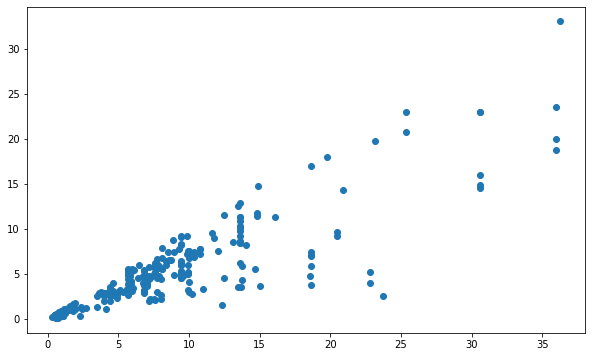

In [32]:
plt.figure(figsize = (10,6))
plt.scatter(data3['Present_Price'], data3['Selling_Price'], cmap = 'rainbow')

<h4>Linear regression or lasso will work 

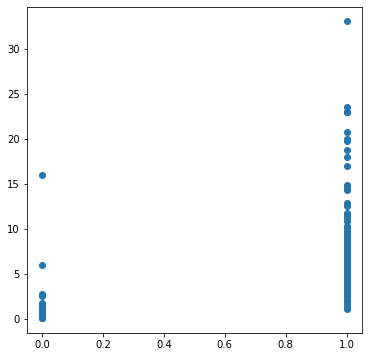

In [33]:
plt.figure(figsize = (6,6))
plt.scatter(data3['Seller_Type'], data3['Selling_Price'], cmap = 'rainbow')

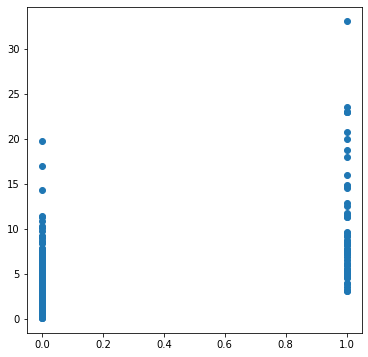

In [34]:
plt.figure(figsize = (6,6))
plt.scatter(data3['Diesel'], data3['Selling_Price'], cmap = 'rainbow')

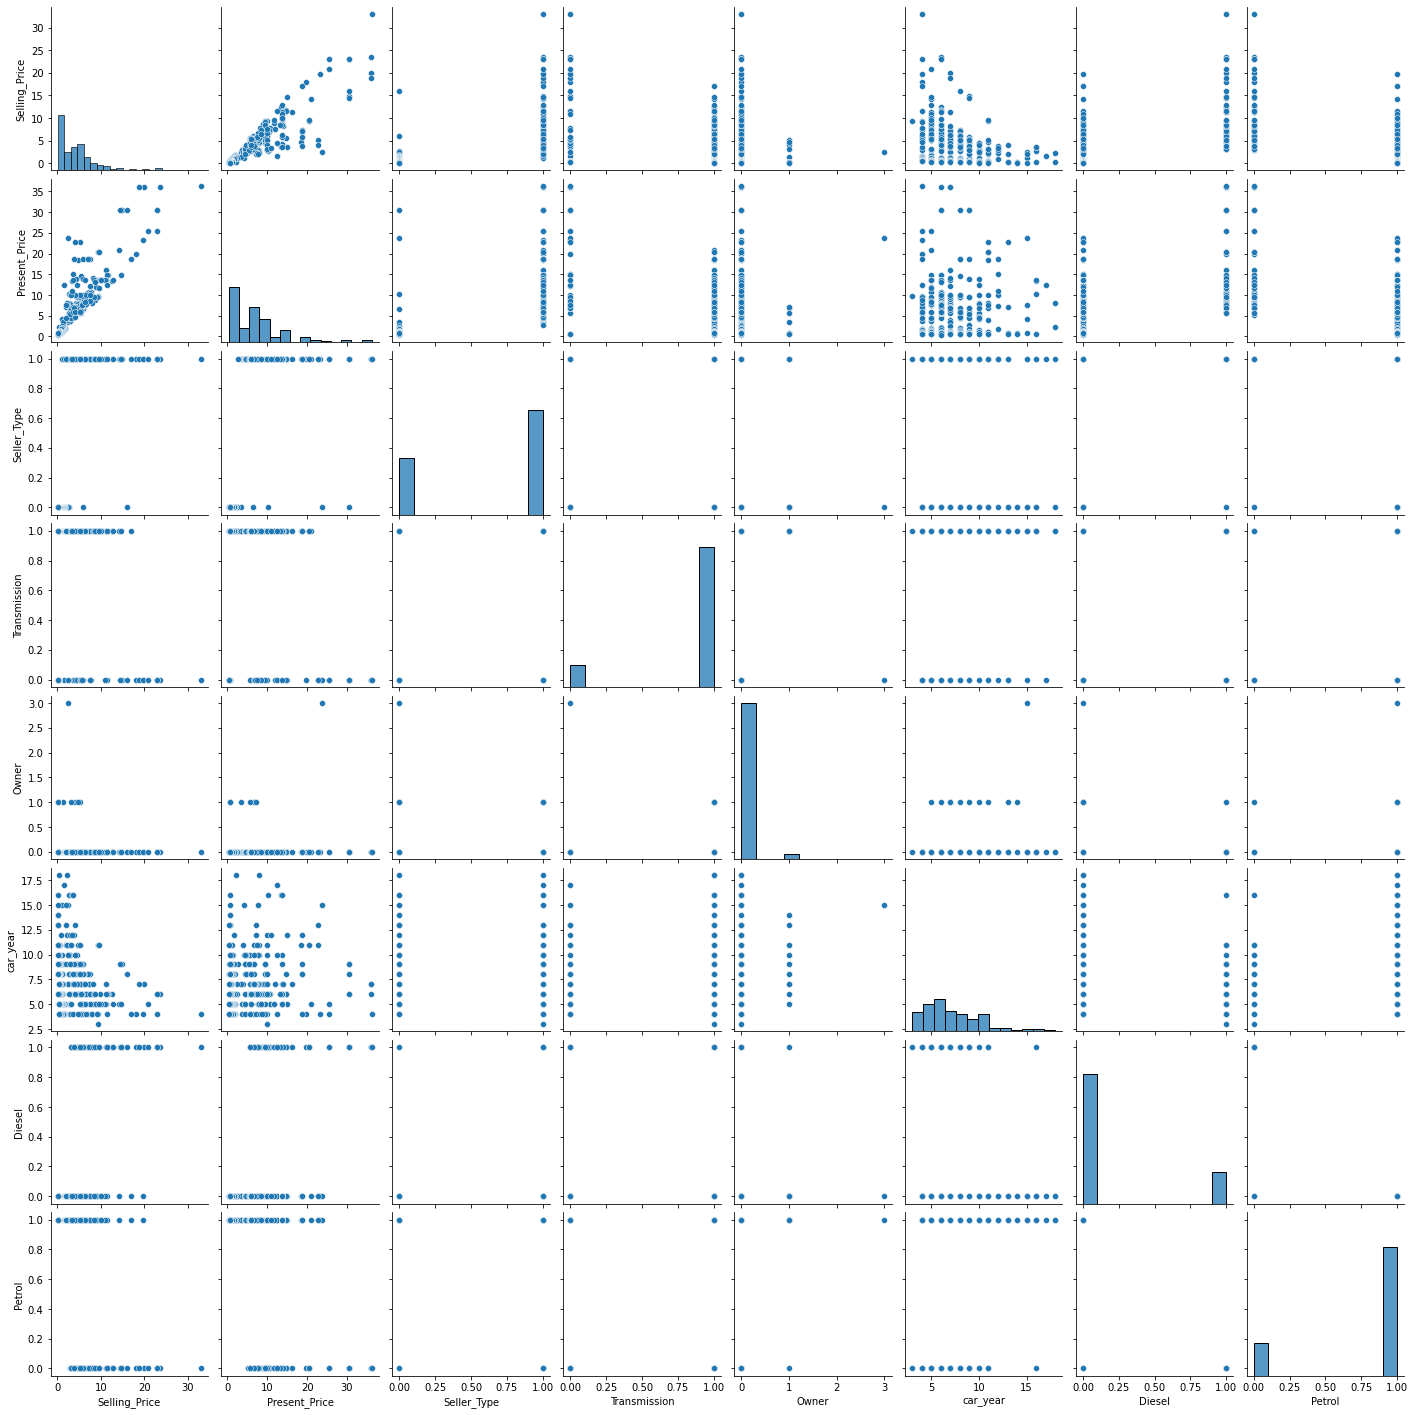

In [35]:
sns.pairplot(data3)

<h4> <li>Random Forest ,linear regression will give best output

<h3>Splliting Data Into Test and Train Data set:

In [36]:
X = data3.drop('Selling_Price', axis = 1)
y = data3['Selling_Price']
print(X.shape, y.shape)

(300, 8) (300,)


<h3>Finding Best Modle for ML

In [38]:
def Finding_best_modle(X,y):
    algos = {
           # 'Linear_regression' : { 'model' : LinearRegression(), 'params' : {'normalize' : [True, False]}},
            'Lasso' : { 'model' : Lasso(), 'params' : {'alpha' : [1,2], 'selection' : ['random', 'cyclic']}},
            'Random Forest' : { 'model' : RandomForestRegressor(), 
                               'params' : {'criterion' : ['mse','friedman_mse'],
                                          'max_depth' : [5, 10, 15], 'min_samples_split' : [2, 5, 10],
                                          'min_samples_leaf' : [1, 2, 5],
                                          'n_estimators' : [100, 200,400, 500,700]}}     
        }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0 )
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, verbose=2)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_ })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


mod_val = Finding_best_modle(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................alpha=1, selection=random; total time=   0.0s
[CV] END ..........................alpha=1, selection=random; total time=   0.0s
[CV] END ..........................alpha=1, selection=random; total time=   0.0s
[CV] END ..........................alpha=1, selection=random; total time=   0.0s
[CV] END ..........................alpha=1, selection=random; total time=   0.0s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.0s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.0s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.0s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.0s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.0s
[CV] END ..........................alpha=2, selection=random; total time=   0.0s
[CV] END ..........................alpha=2, selec

[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_spl

[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_spl

[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_spl

[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.3s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=1, min_sampl

[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.3s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.3s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.4s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_s

[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_sp

[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=1, min_samples_sp

[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_sp

[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=5, min_samples_sp

[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END

[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END

[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END

[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=

[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=

[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.3s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.3s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.3s
[CV] END criterion=friedman_mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.2s


[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.0s


[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.6s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.9s
[CV] END criterion=friedman_mse, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.9s


In [42]:
mod_val

,model,best_score,best_params
0,Lasso,0.783690,"{'alpha': 1, 'selection': 'cyclic'}"
1,Random Forest,0.929348,"{'criterion': 'mse', 'max_depth': 15, 'min_sam..."


<h4> Random Forest Become our best model with accuracy 92.93% and its Parameter are below

In [41]:
mod_val['best_params'][1]# for random forest regression

{'criterion': 'mse',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [44]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)